In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.pyplot import figure
from IPython.display import display, Math, Latex
from matplotlib.legend_handler import HandlerLine2D

In [2]:
stock = web.get_data_yahoo('CMCSA', '2014-02-15', '2019-02-15', interval='d')
print("Number of days: " + str(len(stock['Close'])))

Number of days: 1259


In [3]:
sLength = len(stock['Close'])
stock['Change'] = pd.Series(np.zeros(sLength), index=stock.index)
for i in range(len(stock['Close'])):
    if i > 0:
        stock['Change'][i] = stock['Close'][i] / stock['Close'][i-1] * 100 - 100
    else:
        stock['Change'][i] = float('NaN')

In [4]:
#stock['252d'] = stock['Close'].rolling(window = 252).mean()

In [5]:
sumDiff = 0
for i in range(len(stock['Close'])):
    sumDiff = sumDiff + (stock['Close'][i] - stock['Close'][0])

gaussianSum = (len(stock['Close'])**2 + len(stock['Close']))/2
avGrowth = sumDiff / gaussianSum
#print("Average growth per day: " + str(avGrowth) + " Points")

In [6]:
avGrowthPerCent = avGrowth / stock['Close'][0] * 100
print("Average growth per day: " + str(avGrowthPerCent) + " %")

Average growth per day: 0.03471001085774133 %


In [7]:
sLength = len(stock['Close'])
#print(sLength)
#print(range(sLength))
stock['Average'] = pd.Series(np.zeros(sLength), index=stock.index)
for i in range(len(stock['Close'])):
    if i > 0:
        stock['Average'][i] = stock['Close'][0] + avGrowth*i
    else:
        stock['Average'][i] = float('NaN')

In [8]:
norm_close_factor = stock.iloc[0]['Close']

In [9]:
sLength = len(stock['Close'])
#print(sLength)
#print(range(sLength))
stock['Growth'] = pd.Series(np.zeros(sLength), index=stock.index)
for i in range(len(stock['Close'])):
    stock['Growth'][i] = stock['Close'][i] / norm_close_factor

In [10]:
norm_average_factor = stock.iloc[0]['Average']

In [11]:
sLength = len(stock['Close'])
#print(sLength)
#print(range(sLength))
stock['Average_Growth'] = pd.Series(np.zeros(sLength), index=stock.index)
for i in range(len(stock['Close'])):
    if i > 0:
        stock['Average_Growth'][i] = avGrowth / stock['Close'][0] + stock['Average_Growth'][i-1]
    else:
        stock['Average_Growth'][i] = float(1)

In [12]:
#stock

Text(0.5,1,'Average Growth of Comcast Corporation (NASDAQ:CMCSA)')

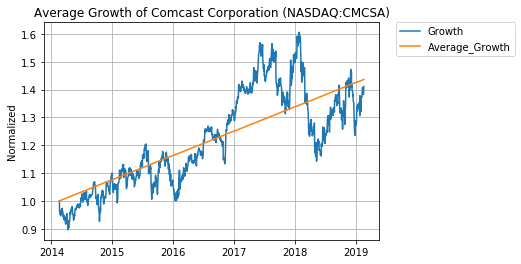

In [14]:
fig = figure(111)

x1 = fig.add_subplot(111)
x1.plot(stock['Growth'])
#x1.plot(stock['252d'], label = '252d')
x1.plot(stock['Average_Growth'], label = 'Average_Growth')
x1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
x1.grid(True)
x1.set_ylabel('Normalized')
x1.set_title('Average Growth of Comcast Corporation (NASDAQ:CMCSA)')